# Creating and visualizing DataFrames 

In [1]:
import pandas as pd
avocados = pd.read_pickle('/work/data_science_notes/3. Data manipulation with pandasw/data/avoplotto.pkl')

## Visualizing your data

### Which avocado size is most popular?

In [2]:
# Print the head of the avocados dataset
# What columns are available?
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [3]:
# For each avocado size group, calculate the total number sold, storing as nb_sold_by_size
nb_sold_by_size = avocados.groupby('size').nb_sold.sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

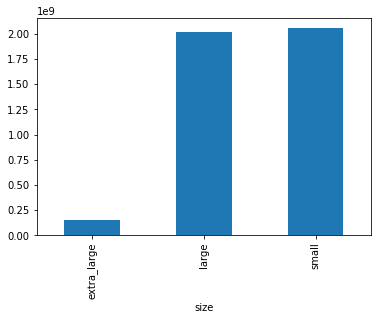

In [4]:
# Create a bar plot of the number of avocados sold by size
import matplotlib.pyplot as plt
nb_sold_by_size.plot(kind='bar')
plt.show()

### Changes in sales over time 

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. 

They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. 

In [5]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date').nb_sold.sum()


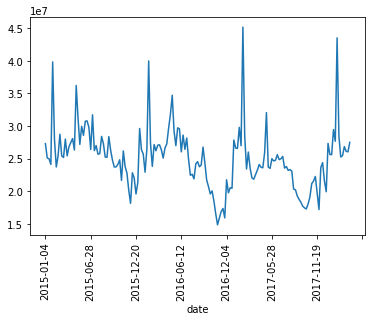

In [6]:
# Create a line plot of the number of avocados sold
nb_sold_by_date.plot(kind='line')
plt.xticks(rotation=90)
plt.show()

### Avocado supply and demand

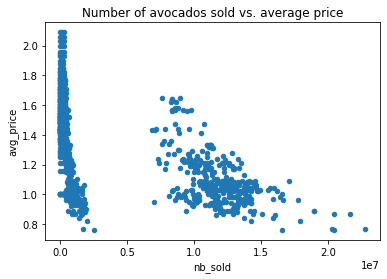

In [7]:
# Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis 
# Title it "Number of avocados sold vs. average price"
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')
plt.show()

### Price of conventional vs. organic avocados

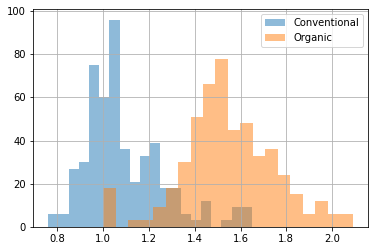

In [8]:
# Subset avocados for the conventional type, and the average price column 
# Create a histogram
avocados[avocados.type == 'conventional'].avg_price.hist(bins=20, alpha=0.5)

# Create a histogram of avg_price for organic type avocados
# Modify your code to adjust the transparency of both histograms to 0.5 to see how much overlap there is between the two distributions
# Modify your code to use 20 bins in both histograms
avocados[avocados.type == 'organic'].avg_price.hist(bins=20, alpha=0.5)

# Add a legend to your plot, with the names "conventional" and "organic"
plt.legend(['Conventional', 'Organic'])

## Missing values

### Finding missing values

Take care of missing values is important. 

Some functions ignore missing data by default, but that's not always the behavior you might want. 

Some functions can't handle missing values at all, so these values need to be taken care of before you can use them.

In [9]:
avocados_2016 = pd.read_csv('/work/data_science_notes/3. Data manipulation with pandasw/data/avocados_2016.csv', index_col=0)
avocados_2016.head() 

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2016-12-11,0.98,30093540.70,9009996.11,NaN,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,NaN,7349757.04,5691266.56,1609867.20,48623.28


In [10]:
# Print a DataFrame that shows whether each value in avocados_2016 is missing or not
avocados_2016.isna()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [11]:
# Print a summary that shows whether any value in each column is missing or not
avocados_2016.isna().sum()

date               0
avg_price          0
total_sold         0
small_sold         6
large_sold         6
xl_sold            4
total_bags_sold    0
small_bags_sold    0
large_bags_sold    0
xl_bags_sold       0
dtype: int64

<AxesSubplot:>

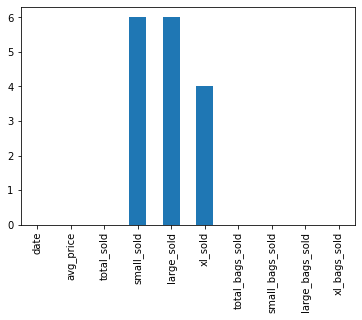

In [12]:
# Create a bar plot of the total number of missing values in each column
avocados_2016.isna().sum().plot(kind='bar')

### Removing missing values

In [13]:
# Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete
avocados_complete = avocados_2016.dropna()

In [14]:
# Verify that all missing values have been removed from avocados_complete
avocados_complete.isna().any()

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

### Replacing missing values

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In [15]:
avocados_2016.isna().sum()

date               0
avg_price          0
total_sold         0
small_sold         6
large_sold         6
xl_sold            4
total_bags_sold    0
small_bags_sold    0
large_bags_sold    0
xl_bags_sold       0
dtype: int64

In [16]:
# Create a list containing the names of columns with missing values: "small_sold", "large_sold", and "xl_sold"
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

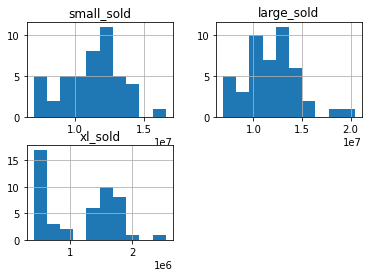

In [20]:
# Create a histogram of those columns
avocados_2016[cols_with_missing].hist()
plt.show()

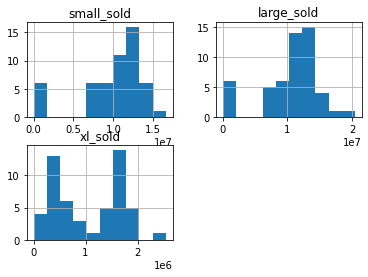

In [23]:
# Replace the missing values of avocados_2016 with 0s and store the result as avocados_filled
avocados_filled = avocados_2016.fillna(0)

# Create a histogram of the cols_with_missing columns of avocados_filled
avocados_filled[cols_with_missing].hist()
plt.show()


## Creating DataFrames

### List of dictionaries

In [24]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date' : "2019-11-03", 'small_sold' : 10376832, 'large_sold' : 7835071},
    {'date': "2019-11-10", 'small_sold' : 10717154, 'large_sold' : 8561348},
]

In [26]:
# Convert the list into a DataFrame called avocados_2019
# Note how each dictionary will be a DataFrame row
avocados_2019 = pd.DataFrame(avocados_list)

# Print your new DataFrame.
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


### Dictionary of lists

In [27]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987,	9291631],
  "large_sold": [7674135, 6238096]
}

In [28]:
# Convert the dictionary to a DataFrame called avocados_2019
avocados_2019_2 = pd.DataFrame(avocados_dict)

# Print your new DataFrame
avocados_2019_2

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


## Reading and writing DataFrames

### DataFrame to CSV

In [29]:
# Save the avocados_complete DataFrame as a CSV called avocados_2016_complete
avocados_complete.to_csv('/work/data_science_notes/3. Data manipulation with pandasw/data/avocados_2016_complete.csv') 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c91f87e-48d2-4010-b7ff-56410ab49fe5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>